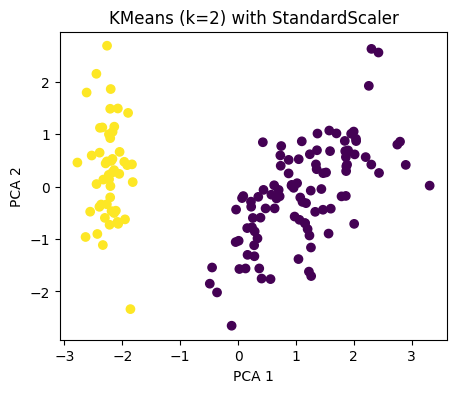

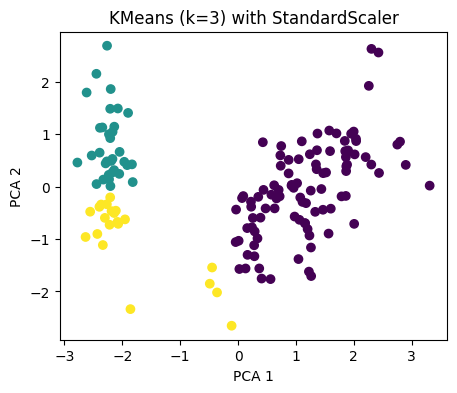

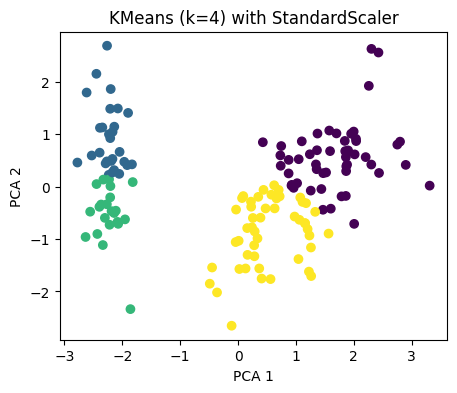

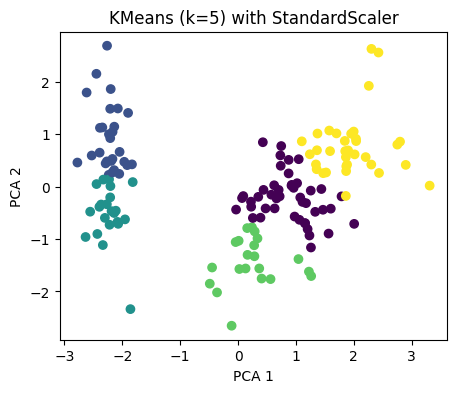

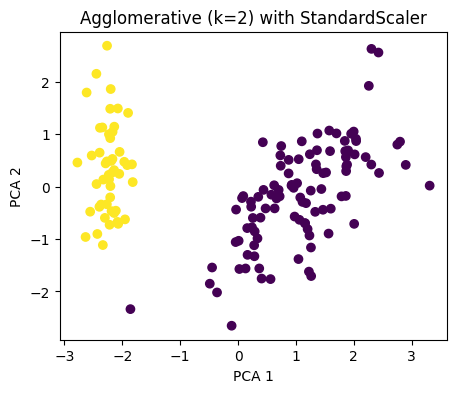

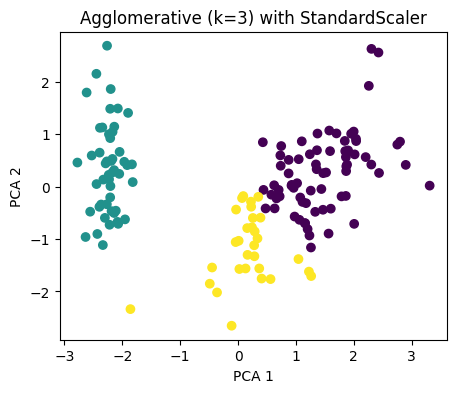

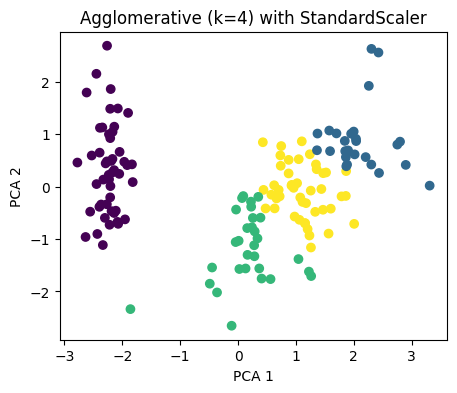

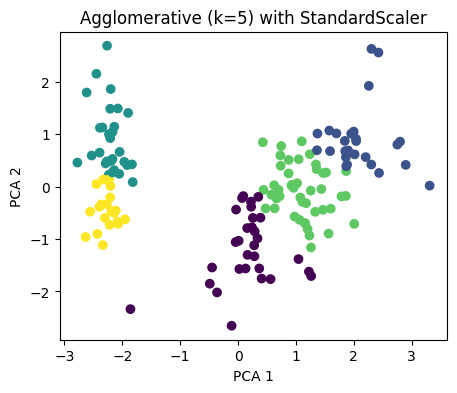

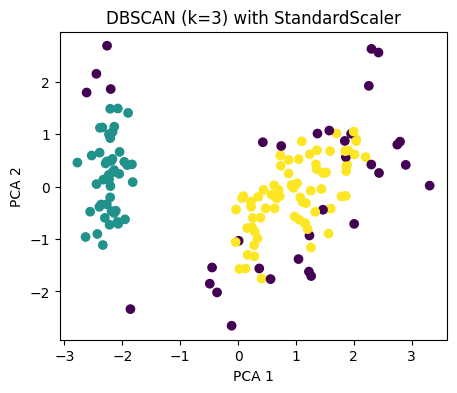

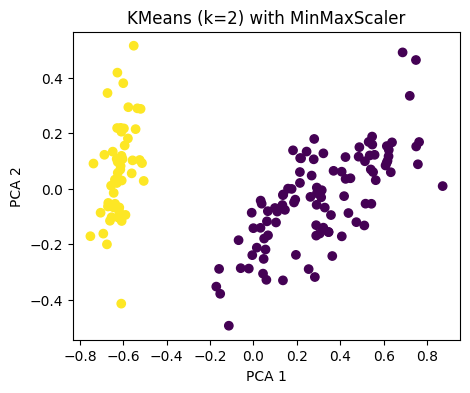

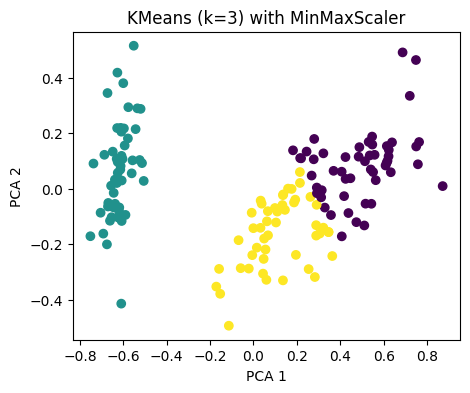

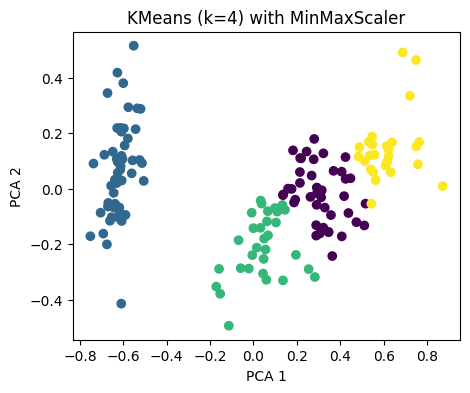

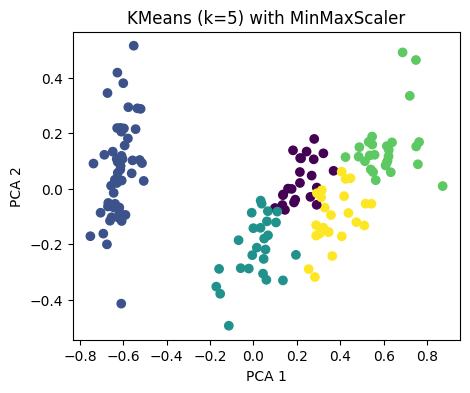

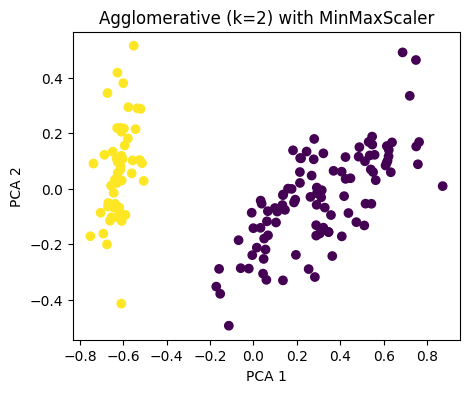

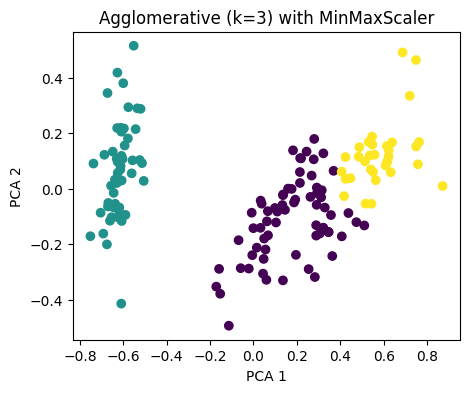

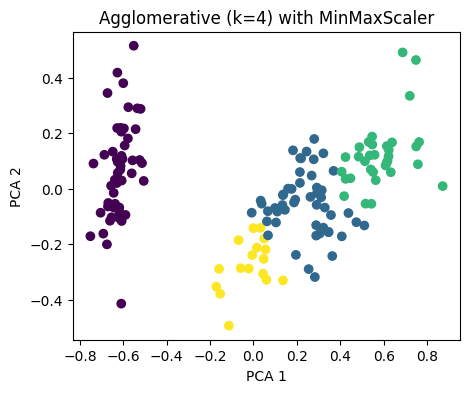

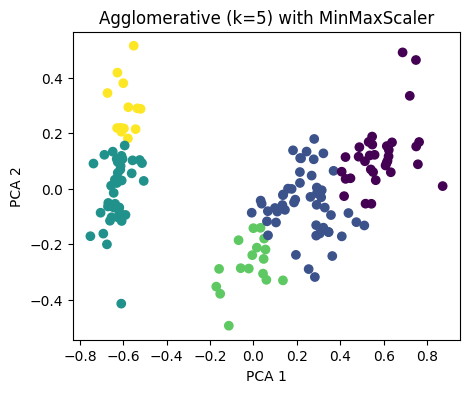


🔍 Clustering Evaluation Summary:



,Scaler,Algorithm,k,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
13,MinMaxScaler,Agglomerative,2,2,0.630047,354.365556,0.486167
9,MinMaxScaler,KMeans,2,2,0.630047,354.365556,0.486167
0,StandardScaler,KMeans,2,2,0.581750,251.349339,0.593313
4,StandardScaler,Agglomerative,2,2,0.577035,240.245665,0.591656
14,MinMaxScaler,Agglomerative,3,3,0.504800,349.254185,0.747977
10,MinMaxScaler,KMeans,3,3,0.482929,351.295064,0.786733
1,StandardScaler,KMeans,3,3,0.479881,157.360153,0.789363
5,StandardScaler,Agglomerative,3,3,0.446689,222.719164,0.803467
11,MinMaxScaler,KMeans,4,4,0.443933,313.892925,0.908155
15,MinMaxScaler,Agglomerative,4,4,0.433036,301.104015,0.848598


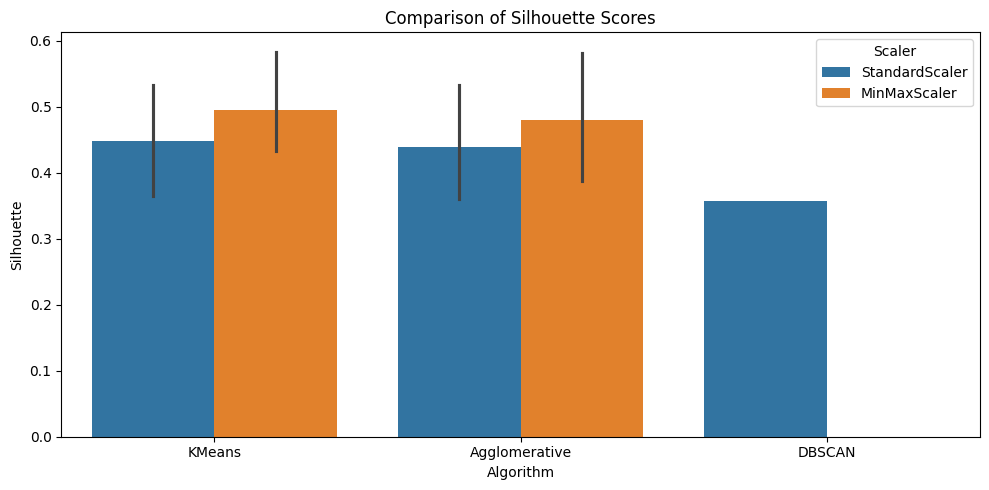

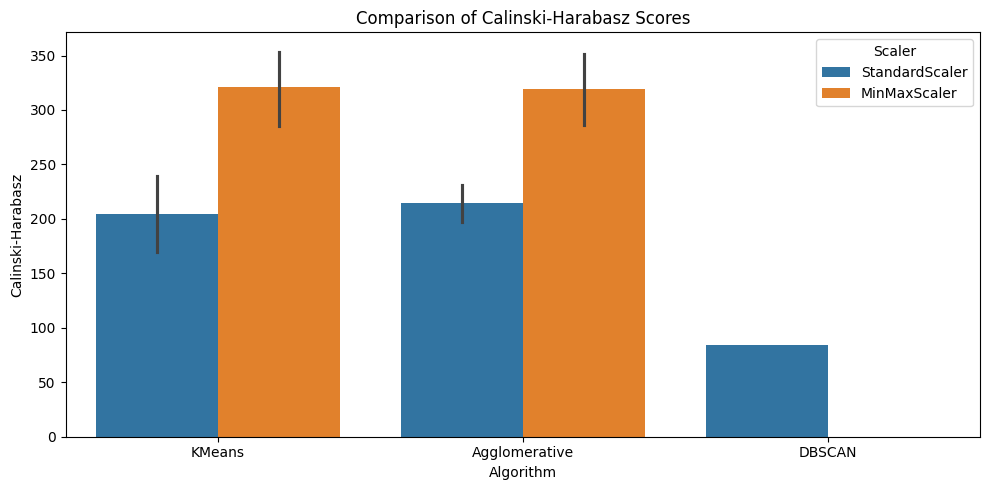

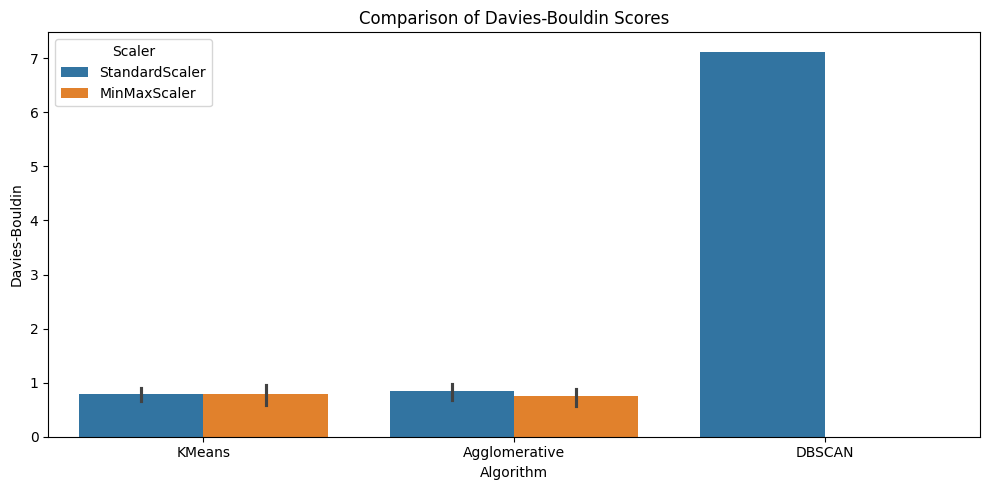

In [1]:
# Comparative Clustering Study - Iris Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

# Preprocessing techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Initialize result storage
results = []

# Define cluster counts to try
k_values = [2, 3, 4, 5]

# Define clustering algorithms
clustering_algorithms = {
    'KMeans': lambda k: KMeans(n_clusters=k, random_state=42),
    'Agglomerative': lambda k: AgglomerativeClustering(n_clusters=k),
    'DBSCAN': lambda _: DBSCAN(eps=0.5, min_samples=5)
}

# Run experiments
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    # Optional PCA for 2D plot (used only for visualization)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    for algo_name, algo_func in clustering_algorithms.items():
        for k in k_values:
            if algo_name == 'DBSCAN' and k != 3:
                continue  # DBSCAN doesn't use k, run only once

            model = algo_func(k)
            cluster_labels = model.fit_predict(X_scaled)

            # Ignore invalid clustering
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            if n_clusters <= 1:
                continue

            # Evaluation
            sil_score = silhouette_score(X_scaled, cluster_labels)
            ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
            db_score = davies_bouldin_score(X_scaled, cluster_labels)

            results.append({
                'Scaler': scaler_name,
                'Algorithm': algo_name,
                'k': k,
                'Clusters': n_clusters,
                'Silhouette': sil_score,
                'Calinski-Harabasz': ch_score,
                'Davies-Bouldin': db_score
            })

            # Plotting
            plt.figure(figsize=(5, 4))
            plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
            plt.title(f"{algo_name} (k={k}) with {scaler_name}")
            plt.xlabel("PCA 1")
            plt.ylabel("PCA 2")
            plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n🔍 Clustering Evaluation Summary:\n")
display(results_df.sort_values(by="Silhouette", ascending=False))

# Plot comparison of evaluation metrics
metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=results_df, x='Algorithm', y=metric, hue='Scaler')
    plt.title(f"Comparison of {metric} Scores")
    plt.legend(title='Scaler')
    plt.tight_layout()
    plt.show()
